# Modelos TFG 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [29]:
df_modelos = pd.read_csv("data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia', case=False)]
categoricas = pd.read_csv("data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [30]:
df_modelos.shape

(728, 141)

In [31]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [32]:
d = df_modelos.loc[:, df_modelos.columns.str.endswith('_4')]
d['fuga'] = df_modelos['fuga']
d['id_registro'] = df_modelos['id_registro']


df_modelos = d
df_modelos

,proteinas_4,quick_4,linfocitos_4,sat_oxig_4,albumina_4,il6_4,neutrofilos_4,temp_corp_4,pcr_4,plaquetas_4,leucocitos_4,tad_4,tas_4,creatinina_4,frec_resp_4,eva_4,frec_card_4,fuga,id_registro
0,3.20,NaN,NaN,96.0,3.4,NaN,8.036250,36.5,250.10,11.695255,7.993282,85.0,110.0,1.50,22.0,5.0,88.0,0,92-1
1,4.50,NaN,NaN,93.0,3.0,23.16,8.537192,35.6,99.00,11.918397,8.757941,77.0,108.0,0.93,16.0,4.0,85.0,0,92-2
2,4.80,NaN,NaN,99.0,4.0,80.00,8.509363,36.0,235.70,11.751950,8.684570,40.0,79.0,0.76,23.0,2.0,46.0,0,92-3
3,4.30,NaN,7.082549,80.0,3.5,850.00,8.895767,36.9,182.60,11.580593,9.121618,50.0,100.0,0.48,25.0,5.0,100.0,1,92-4
4,5.03,NaN,NaN,96.0,3.6,310.00,8.581294,36.6,446.82,12.556733,8.771990,59.0,121.0,0.59,18.0,5.0,102.0,1,92-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,NaN,77.0,6.538140,96.0,NaN,NaN,9.730383,37.5,30.38,12.001512,9.908525,56.0,101.0,0.87,31.0,4.0,90.0,1,613-30
724,NaN,91.0,6.621406,98.0,NaN,NaN,8.446985,36.8,8.47,12.037660,8.719481,59.0,118.0,0.45,25.0,2.0,74.0,0,613-31
725,NaN,69.0,7.320527,98.0,NaN,NaN,8.343078,35.4,4.26,12.685411,8.779711,70.0,121.0,0.60,22.0,1.0,67.0,0,613-32
726,NaN,64.0,NaN,94.0,NaN,NaN,7.378384,36.8,168.00,11.728045,7.812378,78.0,112.0,0.60,12.0,3.0,56.0,1,617-1


In [33]:
for col in df_modelos.columns:
    print(col)

proteinas_4
quick_4
linfocitos_4
sat_oxig_4
albumina_4
il6_4
neutrofilos_4
temp_corp_4
pcr_4
plaquetas_4
leucocitos_4
tad_4
tas_4
creatinina_4
frec_resp_4
eva_4
frec_card_4
fuga
id_registro


## Modelos

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [35]:
df_tmp = df_modelos.copy().drop('id_registro', axis=1, errors='ignore')
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]

# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# # Ajustar y transformar las columnas categóricas
# X_cat_encoded = encoder.fit_transform(df_tmp[categoricas])

# # Crear DataFrame con los nuevos nombres de columnas
# cat_encoded_df = pd.DataFrame(
#     X_cat_encoded,
#     columns=encoder.get_feature_names_out(categoricas),
#     index=df_tmp.index  # mantener los índices originales
# )

# # Concatenar con el resto de columnas no categóricas
# X_encoded = pd.concat([df_tmp.drop(columns=categoricas), cat_encoded_df], axis=1).drop(columns='fuga')
y = df_tmp['fuga']
X = df_tmp.drop(columns='fuga')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [36]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


param_grid = {
    'max_iter': [100],
    'learning_rate': [0.5, 0.8, 0.9, 1],
    'max_depth': [1, 2],
    'min_samples_leaf': [1, 2, 3, 4],
    'early_stopping': [True],
    'l2_regularization': [0.6, 0.7, 0.8, 1],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# Use RandomizedSearchCV for a more efficient search
grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=LeaveOneOut(),
                   estimator=HistGradientBoostingClassifier(random_state=14),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'early_stopping': [True],
                                        'l2_regularization': [0.6, 0.7, 0.8, 1],
                                        'learning_rate': [0.5, 0.8, 0.9, 1],
                                        'max_depth': [1, 2], 'max_iter': [100],
                                        'min_samples_leaf': [1, 2, 3, 4]})

In [37]:
#best hiperparameters
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  1
max_depth:  2
min_samples_leaf:  4
early_stopping:  True
l2_regularization:  0.8
class_weight:  None
Mejor puntuación:
0.7721518987341772


In [38]:
#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[295  87]
 [ 21  71]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.77      0.85       382
           1       0.45      0.77      0.57        92

    accuracy                           0.77       474
   macro avg       0.69      0.77      0.71       474
weighted avg       0.84      0.77      0.79       474

Accuracy: 0.7721518987341772
AUC: 0.8212070339175961


Matriz de confusión con test
[[109  56]
 [ 19  20]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       165
           1       0.26      0.51      0.35        39

    accuracy                           0.63       204
   macro avg       0.56      0.59      0.55       204
weighted avg       0.74      0.63      0.67       204

Accuracy: 0.6323529411764706
AUC: 0.6446775446775447


In [39]:
modelo_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=True,
                               l2_regularization=0.8, learning_rate=1,
                               max_depth=1, min_samples_leaf=4, random_state=14,
                               scoring='roc_auc')

In [40]:
# grid search
# modelo con selection 
# busqueda del modelo, punto vista modelo y medico



In [41]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=10)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-10:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x147df8ca0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00319, mean = 0.404, max = 0.985
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.968, mean = -0.211, max = 0.972
  -> model_info        : package sklearn

A new explainer has been created!


In [42]:
for im in imps:
    if im not in X.columns:
        imps.remove(im)

imps


['creatinina_4',
 'tas_4',
 'leucocitos_4',
 'eva_4',
 'neutrofilos_4',
 'frec_card_4',
 'il6_4',
 'quick_4',
 'pcr_4']

In [43]:
X['id_registro'] = d['id_registro']

In [44]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
df_imps = X[imps]
df_imps['id_registro'] = df_modelos['id_registro']

#save as a dataframe the csv: data/datosFinales/df_dalex.csv
df_dalex = pd.read_csv("data/datosFinales/df_dalex.csv", sep = ";")
df_dalex['id_registro'] = df_modelos['id_registro']


In [45]:
overlap_cols = set(df_imps.columns) & set(df_dalex.columns) - {'id_registro'}
df_imps_filtered = df_imps.drop(columns=overlap_cols)

merged = pd.merge(df_imps_filtered, df_dalex, on='id_registro', how='left')
merged.to_csv("data/datosFinales/df_dalex.csv", sep=";", index=False)

In [46]:
#quita de categoricas las variables que no estan en df_sel
categoricas2 = [col for col in categoricas if col in df_imps.columns]

In [47]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp.drop(columns=categoricas2), cat_encoded_df], axis=1).drop(columns='fuga')

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=14)

In [48]:
X_encoded

,proteinas_4,quick_4,linfocitos_4,sat_oxig_4,albumina_4,il6_4,neutrofilos_4,temp_corp_4,pcr_4,plaquetas_4,leucocitos_4,tad_4,tas_4,creatinina_4,frec_resp_4,eva_4,frec_card_4
0,3.20,NaN,NaN,96.0,3.4,NaN,8.036250,36.5,250.10,11.695255,7.993282,85.0,110.0,1.50,22.0,5.0,88.0
1,4.50,NaN,NaN,93.0,3.0,23.16,8.537192,35.6,99.00,11.918397,8.757941,77.0,108.0,0.93,16.0,4.0,85.0
2,4.80,NaN,NaN,99.0,4.0,80.00,8.509363,36.0,235.70,11.751950,8.684570,40.0,79.0,0.76,23.0,2.0,46.0
3,4.30,NaN,7.082549,80.0,3.5,850.00,8.895767,36.9,182.60,11.580593,9.121618,50.0,100.0,0.48,25.0,5.0,100.0
4,5.03,NaN,NaN,96.0,3.6,310.00,8.581294,36.6,446.82,12.556733,8.771990,59.0,121.0,0.59,18.0,5.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,NaN,90.0,7.501634,96.0,NaN,NaN,9.042040,36.8,6.20,12.254868,9.417436,89.0,145.0,0.65,28.0,2.0,77.0
723,NaN,77.0,6.538140,96.0,NaN,NaN,9.730383,37.5,30.38,12.001512,9.908525,56.0,101.0,0.87,31.0,4.0,90.0
724,NaN,91.0,6.621406,98.0,NaN,NaN,8.446985,36.8,8.47,12.037660,8.719481,59.0,118.0,0.45,25.0,2.0,74.0
725,NaN,69.0,7.320527,98.0,NaN,NaN,8.343078,35.4,4.26,12.685411,8.779711,70.0,121.0,0.60,22.0,1.0,67.0


In [49]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[295  87]
 [ 21  71]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.77      0.85       382
           1       0.45      0.77      0.57        92

    accuracy                           0.77       474
   macro avg       0.69      0.77      0.71       474
weighted avg       0.84      0.77      0.79       474

Accuracy: 0.7721518987341772
AUC: 0.8212070339175961


Matriz de confusión con test
[[109  56]
 [ 19  20]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       165
           1       0.26      0.51      0.35        39

    accuracy                           0.63       204
   macro avg       0.56      0.59      0.55       204
weighted avg       0.74      0.63      0.67       204

Accuracy: 0.6323529411764706
AUC: 0.6446775446775447


In [50]:
#0.64

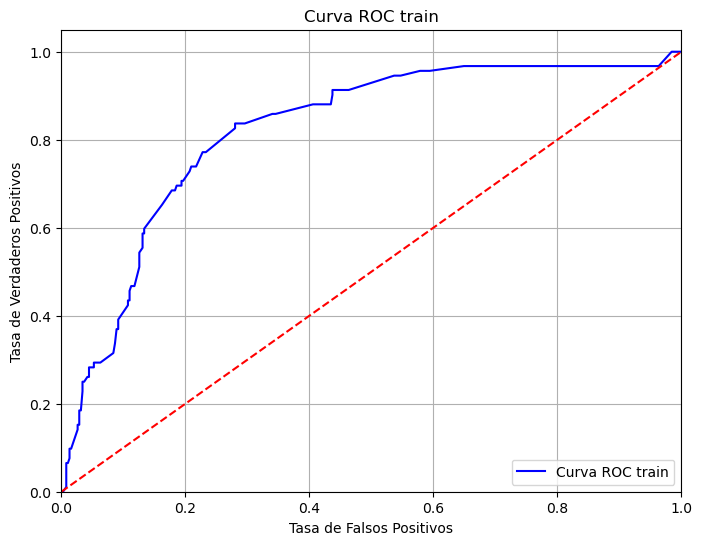

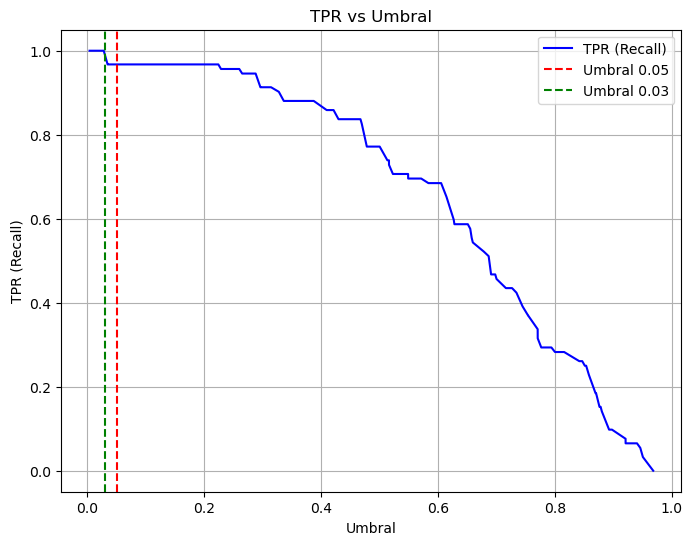

In [51]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



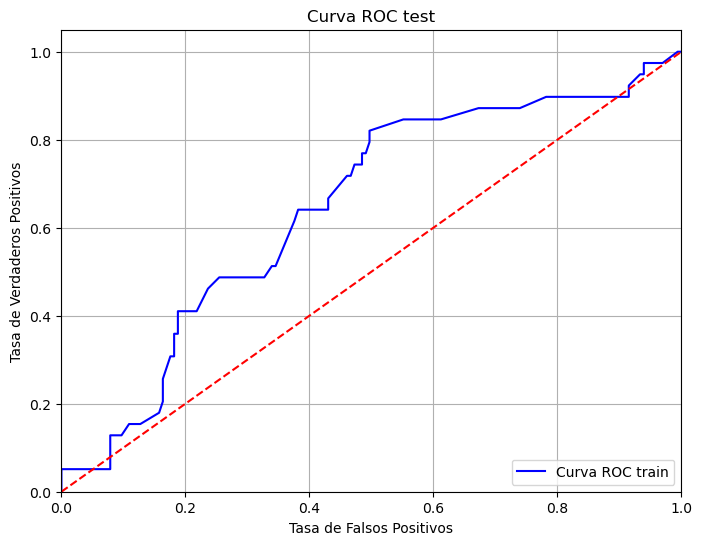

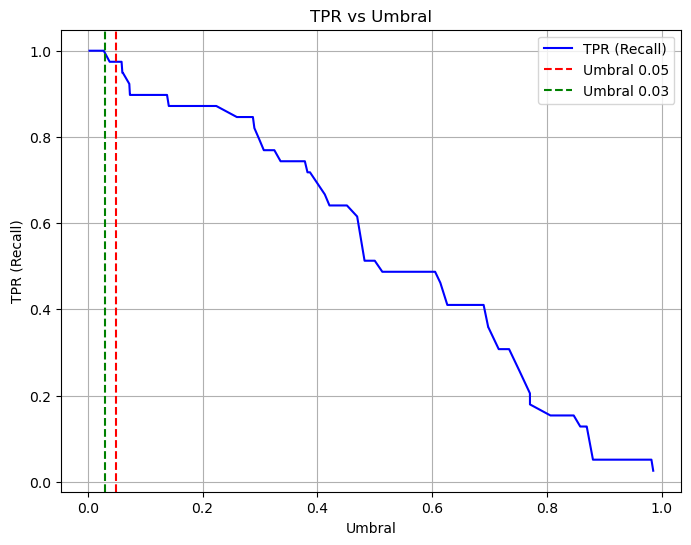

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



Umbral óptimo ROC: 0.4516
Umbral óptimo según F1-score: 0.5132


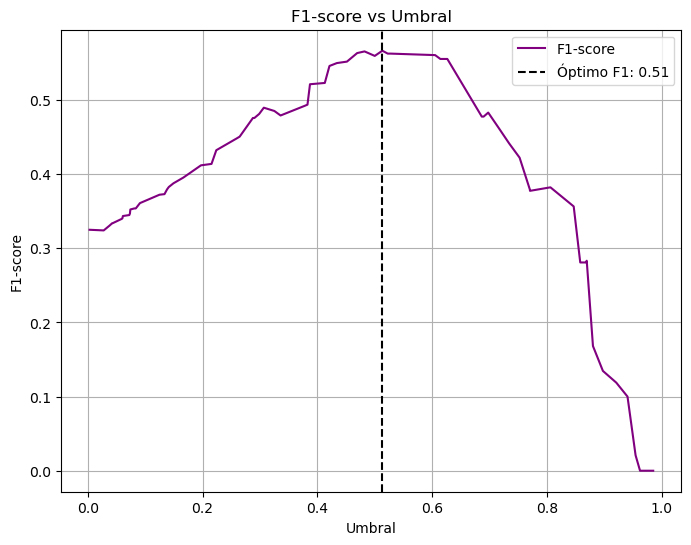

In [53]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


In [54]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[ 71, 311],
       [  3,  89]])

In [55]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[103,  62],
       [ 15,  24]])